In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

#Loard dataset
df=pd.read_csv(r"C:/Users/DELL/Desktop/DATA SCIENCE/songs_normalize.csv")

df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [8]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1941, 18)

In [18]:
# Description of the Data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


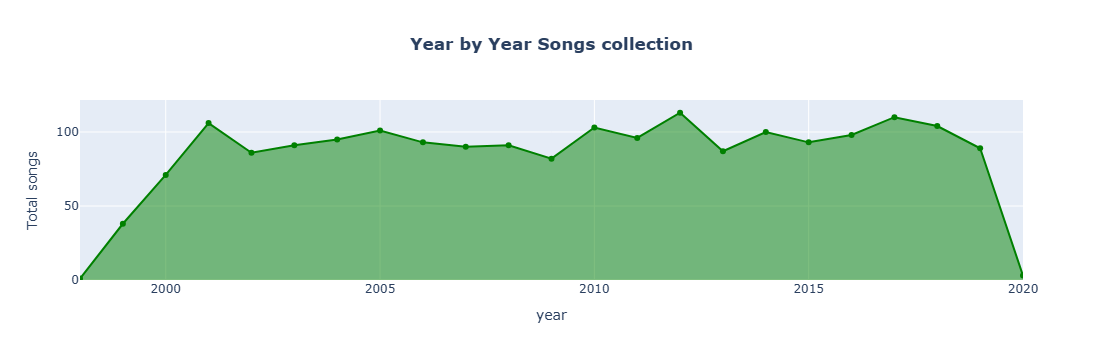

In [28]:
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',markers=True,labels={'song':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

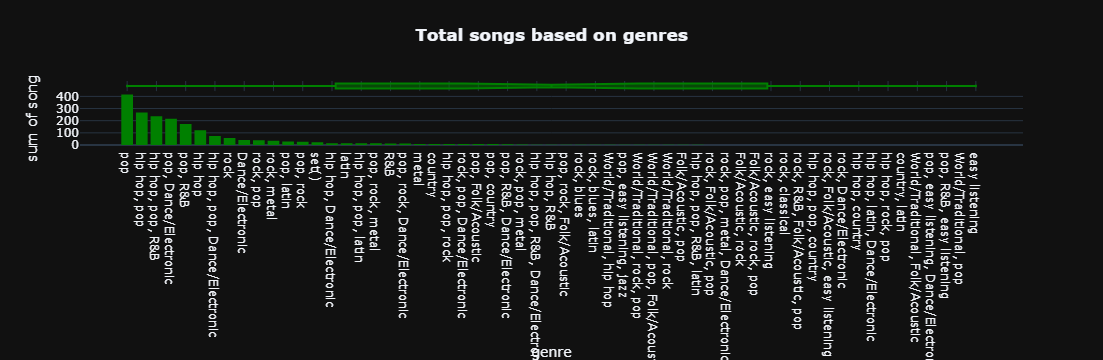

In [30]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)


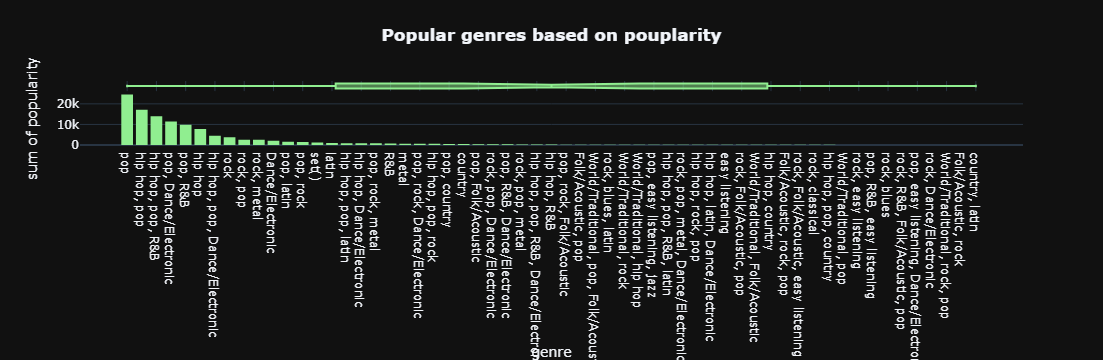

In [32]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

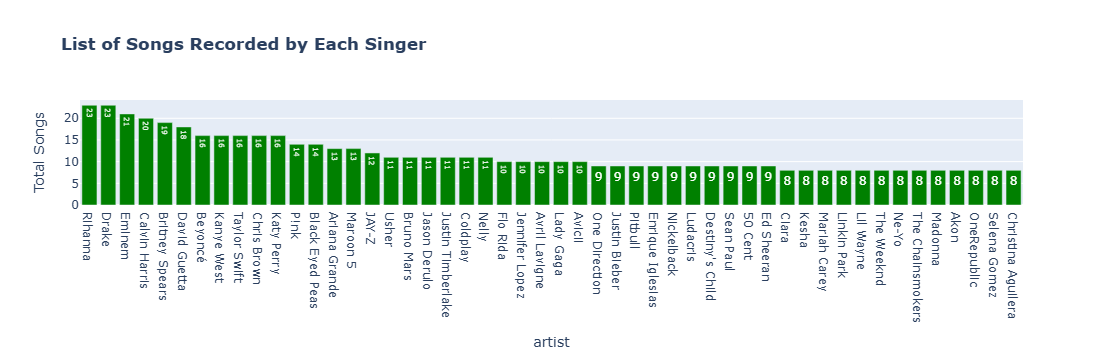

In [34]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

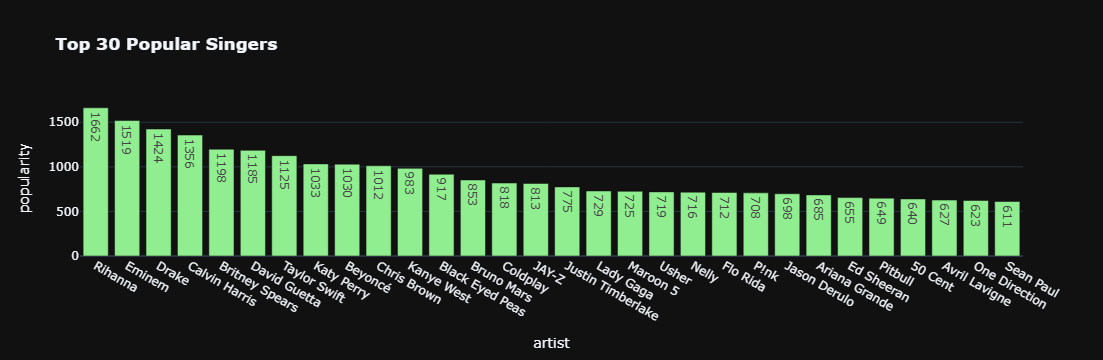

In [36]:
px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),x='artist',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

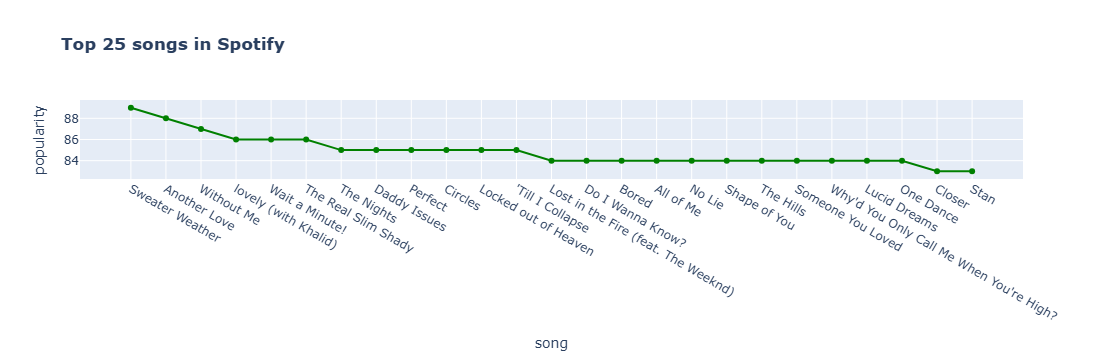

In [38]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],markers=True,title='<b> Top 25 songs in Spotify')
fig.show()


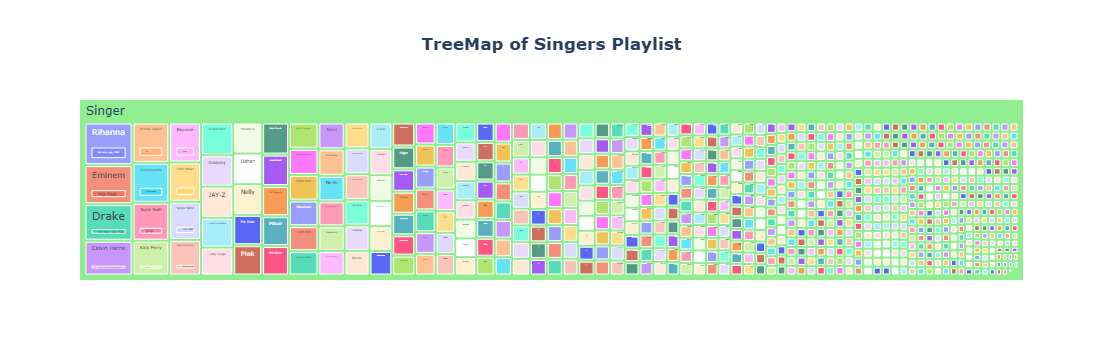

In [40]:
fig=px.treemap(df,path=[px.Constant('Singer'),'artist','genre','song'],values='popularity',title='<b>TreeMap of Singers Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)


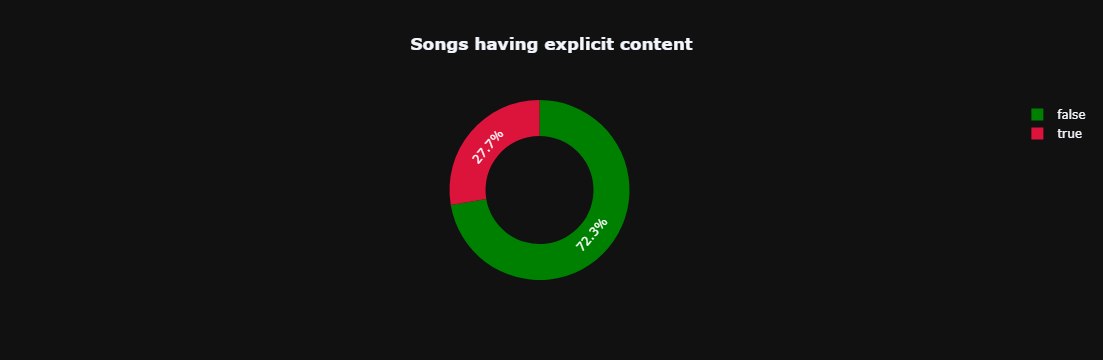

In [42]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

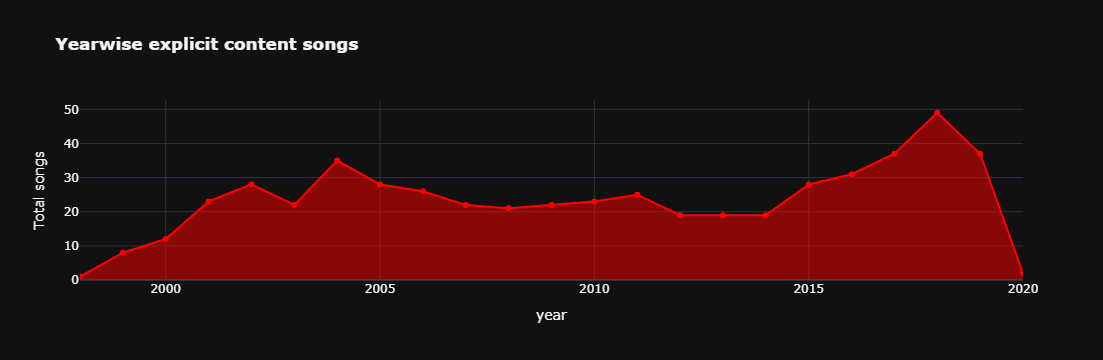

In [44]:
fig=px.area(df[df['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',labels={'song':'Total songs'},markers=True,color_discrete_sequence=['red'],template='plotly_dark',title='<b>Yearwise explicit content songs')
fig.update_layout(hovermode='x')


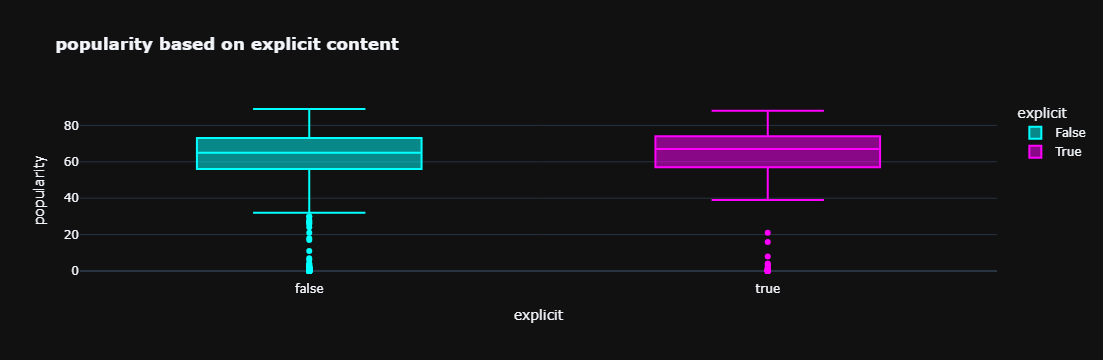

In [46]:
px.box(df,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')

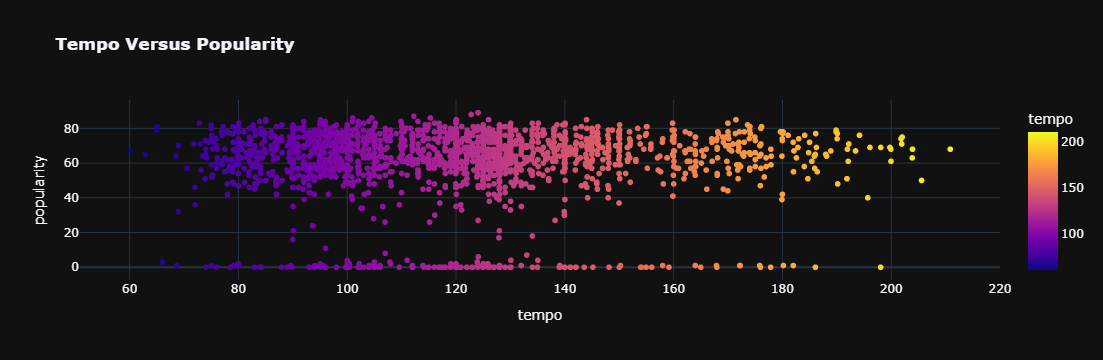

In [48]:
px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

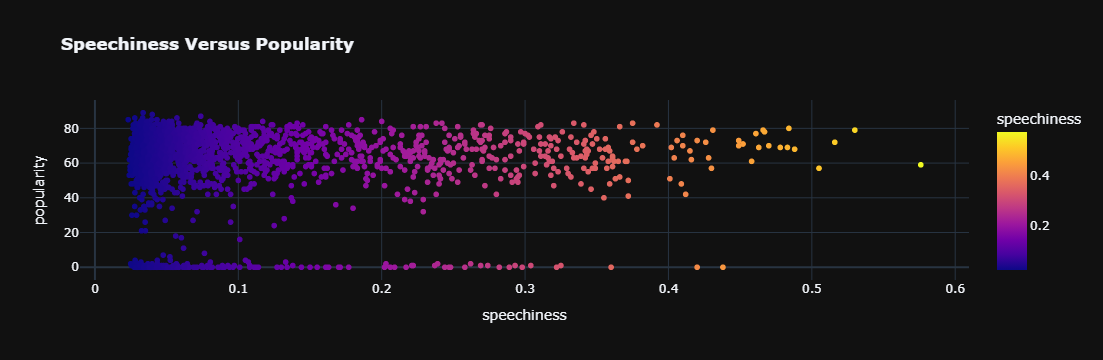

In [50]:
px.scatter(df,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Speechiness Versus Popularity')

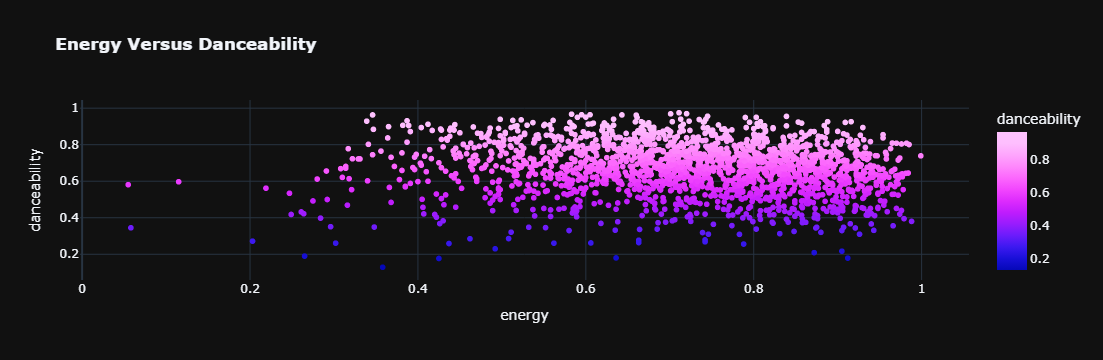

In [52]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')


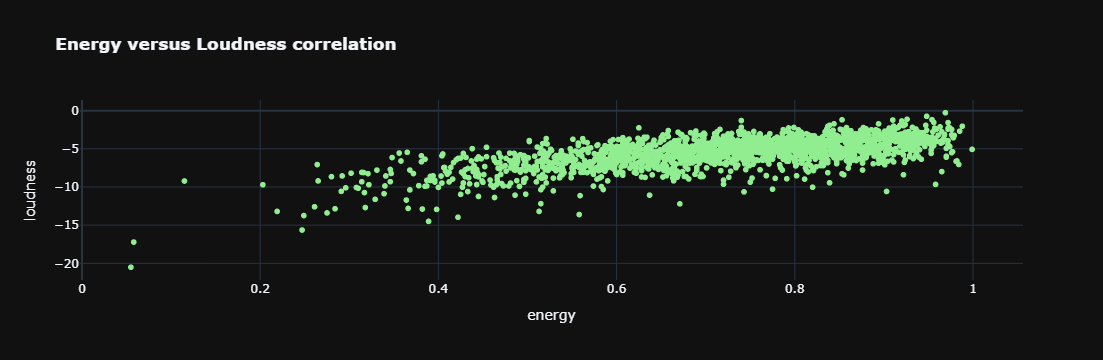

In [54]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')

In [ ]:
#From the Analysis, we can conclude that the most popular genre in the music market is pop. According to the musicians, pop music is inherently popular because it creates a sense of familiarity for listeners. Therefore, when they hear the same 'woop' throughout the genre, they're more inclined to ease into a piece of music they've never heard because it sounds familiar. Almost 28% of Songs contains Explicit Content and on coming to popularity, explicit content songs Has high median popularity. The top 3 singers who recorded maximum songs in their album are Rihanna, Drake and Eminem. Top 3 popular Singers in Spotify are
#Rihanna , Eminem and Drake . Top 3 popular songs to check out are

#1. Sweather Weather by The Neighbourhood
#2. Another Love by Tom Odell
#3. Without Me by Eminem.